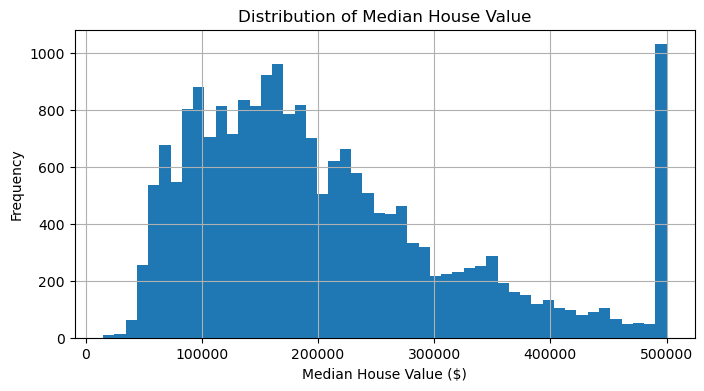

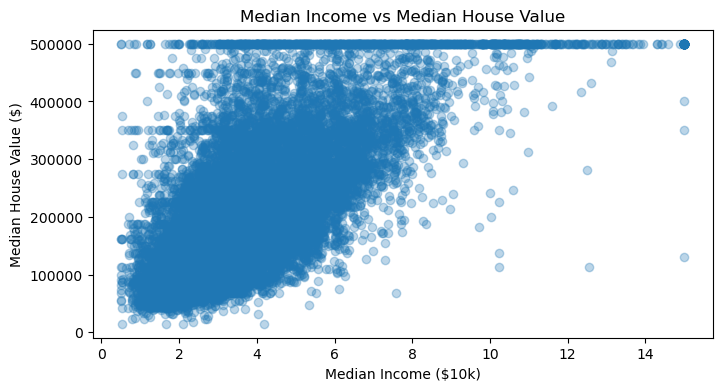

Intercept: 44459.73
Slope: 41933.85
RMSE: 84,209
R²: 0.459
RMSE: 70,059
R²: 0.625


,Model,RMSE,R²
0,Simple LR,84209.012414,0.458859
1,Multiple LR,70059.193339,0.625438


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
df = pd.read_csv('Data_file.csv')
df.head()
df.describe().T
plt.figure(figsize=(8,4))
df['median_house_value'].hist(bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

# Scatter: median_income vs median_house_value
plt.figure(figsize=(8,4))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income ($10k)')
plt.ylabel('Median House Value ($)')
plt.show()
X_simple = df[['median_income']]
y = df['median_house_value']

# Train‑test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_s, y_train_s)

# Predictions & metrics
y_pred_s = lin_reg.predict(X_test_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = math.sqrt(mse_s)
r2_s = r2_score(y_test_s, y_pred_s)

print(f"Intercept: {lin_reg.intercept_:.2f}")
print(f"Slope: {lin_reg.coef_[0]:.2f}")
print(f"RMSE: {rmse_s:,.0f}\nR²: {r2_s:.3f}")
# Separate features & target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identify numeric & categorical columns
numeric_features = ['longitude','latitude','housing_median_age','total_rooms',
                    'total_bedrooms','population','households','median_income']
categorical_features = ['ocean_proximity']

# Pre‑processing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# End‑to‑end pipeline
multi_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train‑test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit & evaluate
multi_reg.fit(X_train, y_train)
y_pred = multi_reg.predict(X_test)
mse_m = mean_squared_error(y_test, y_pred)
rmse_m = math.sqrt(mse_m)
r2_m = r2_score(y_test, y_pred)

print(f'RMSE: {rmse_m:,.0f}\nR²: {r2_m:.3f}')
metrics = pd.DataFrame({
    'Model': ['Simple LR', 'Multiple LR'],
    'RMSE': [rmse_s, rmse_m],
    'R²': [r2_s, r2_m]
})
metrics